# CrowdTruth for Sparse Multiple Choice Tasks: Event Extraction

In [1]:
import pandas as pd
file_name = "f1328283"
test_data = pd.read_csv("../../data/pilot_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,notpossible_gold,pos_tags,selectedtags_desc_gold,sentence,sentence_id,stanford_lemma,stanford_lower_lemma,stanford_pos_tag,time_expressions,tokens
0,2039962326,12/7/2018 13:08:19,4316804229,12/7/2018 13:08:09,False,instagc,1.0,1c652ec0bfd445a7e3e6fa284c4502f1,USA,IN,...,NaN,16,NaN,BP expects the share buyback programme could t...,6,bp expect the share buyback programme could ta...,bp expect the share buyback programme could ta...,NN VBZ DT NN NN NN MD VB IN CD CC CD NNS TO VB .,2,16
1,2039962326,12/7/2018 14:23:01,4317004165,12/7/2018 14:22:50,False,instagc,1.0,62a40c4eeb6901bc06effcd3b83b9ae2,USA,TN,...,NaN,16,NaN,BP expects the share buyback programme could t...,6,bp expect the share buyback programme could ta...,bp expect the share buyback programme could ta...,NN VBZ DT NN NN NN MD VB IN CD CC CD NNS TO VB .,2,16
2,2039962326,12/7/2018 15:20:33,4317186803,12/7/2018 15:19:49,False,coinworker,1.0,7532f1d32c3e3f10639151705a342394,USA,NY,...,NaN,16,NaN,BP expects the share buyback programme could t...,6,bp expect the share buyback programme could ta...,bp expect the share buyback programme could ta...,NN VBZ DT NN NN NN MD VB IN CD CC CD NNS TO VB .,2,16
3,2039962326,12/7/2018 15:37:10,4317247386,12/7/2018 15:30:57,False,prodege,1.0,e1348a79a458a304fb5c1eaa37e3d459,CAN,ON,...,NaN,16,NaN,BP expects the share buyback programme could t...,6,bp expect the share buyback programme could ta...,bp expect the share buyback programme could ta...,NN VBZ DT NN NN NN MD VB IN CD CC CD NNS TO VB .,2,16
4,2039962326,12/7/2018 16:48:04,4317538376,12/7/2018 16:47:46,False,coinworker,1.0,642e68771a04929b963d848efc65685e,CAN,QC,...,NaN,16,NaN,BP expects the share buyback programme could t...,6,bp expect the share buyback programme could ta...,bp expect the share buyback programme could ta...,NN VBZ DT NN NN NN MD VB IN CD CC CD NNS TO VB .,2,16


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of all relations that were given as input to the crowd in at least one sentence
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [3]:
class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "time_expressions", "sentence", "lowercase_sentence", "sentence_id", "all_runs_times"]
    outputColumns = ["selectedtags_desc"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [4]:
data_open, config = crowdtruth.load(
    file = "../../data/pilot_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

,output.selectedtags_desc,output.selectedtags_desc.count,output.selectedtags_desc.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
4316804229,{'12 and 18 months__58__74': 1},1,1,2039962326,1c652ec0bfd445a7e3e6fa284c4502f1,2018-12-07 13:08:09,2018-12-07 13:08:19,10,../../data/pilot_crowd_data/raw_data/f1328283
4317004165,"{'18 months__65__74': 1, '12 and 18 months__58...",3,3,2039962326,62a40c4eeb6901bc06effcd3b83b9ae2,2018-12-07 14:22:50,2018-12-07 14:23:01,11,../../data/pilot_crowd_data/raw_data/f1328283
4317186803,{'12 and 18 months__58__74': 1},1,1,2039962326,7532f1d32c3e3f10639151705a342394,2018-12-07 15:19:49,2018-12-07 15:20:33,44,../../data/pilot_crowd_data/raw_data/f1328283
4317247386,"{'18 months__65__74': 1, '12 and 18 months__58...",2,2,2039962326,e1348a79a458a304fb5c1eaa37e3d459,2018-12-07 15:30:57,2018-12-07 15:37:10,373,../../data/pilot_crowd_data/raw_data/f1328283
4317538376,{'12 and 18 months__58__74': 1},1,1,2039962326,642e68771a04929b963d848efc65685e,2018-12-07 16:47:46,2018-12-07 16:48:04,18,../../data/pilot_crowd_data/raw_data/f1328283


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [5]:
results_open = crowdtruth.run(data_open, config)

`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [6]:
results_open["units"].head()

,duration,input.all_runs_times,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,input.time_expressions,job,output.selectedtags_desc,output.selectedtags_desc.annotations,output.selectedtags_desc.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,,
2039962326,44.55,18 months__65__74###12 and 18 months__58__74##...,bbc_20130322_332,bp expects the share buyback programme could t...,BP expects the share buyback programme could t...,6,2,../../data/pilot_crowd_data/raw_data/f1328283,"{'12 and 18 months__58__74': 19, '18 months__6...",32,4,20,0.763835,{'12 and 18 months__58__74': 0.985721784079773...,0.725417,"{'12 and 18 months__58__74': 0.95, '18 months_..."
2039962327,41.90,1953__113__117###1953 .__113__119,bbc_20130322_1150,new zealand-born mr lowe was part of the team ...,New Zealand-born Mr Lowe was part of the team ...,2,1,../../data/pilot_crowd_data/raw_data/f1328283,"{'1953__113__117': 15, '1953 .__113__119': 14}",29,2,20,0.708842,"{'1953__113__117': 0.778418616474394, '1953 ._...",0.689492,"{'1953__113__117': 0.75, '1953 .__113__119': 0.7}"
2039962328,20.75,1953__71__75,bbc_20130322_1150,the last surviving member of the team which fi...,The last surviving member of the team which fi...,0,1,../../data/pilot_crowd_data/raw_data/f1328283,"{'1953__71__75': 19, 'no_time': 1}",20,2,20,0.970126,"{'1953__71__75': 0.9856577859941497, 'no_time'...",0.900000,"{'1953__71__75': 0.95, 'no_time': 0.05}"
2039962329,35.65,1957 - 58__60__69###1957__60__64###58__67__69,bbc_20130322_1150,mr lowe also took part in the trans-antarctic ...,Mr Lowe also took part in the trans-Antarctic ...,4,2,../../data/pilot_crowd_data/raw_data/f1328283,"{'1957 - 58__60__69': 17, '1957__60__64': 9, '...",31,3,20,0.679520,"{'1957 - 58__60__69': 0.8978163780674249, '195...",0.638295,"{'1957 - 58__60__69': 0.85, '1957__60__64': 0...."
2039962330,37.65,1984__19__23###last June__75__84,bbc_20130322_1150,the last british climbing member of the 1953 t...,The last British climbing member of the 1953 t...,19,1,../../data/pilot_crowd_data/raw_data/f1328283,"{'last june__75__84': 20, '1984__19__23': 5}",25,2,20,0.878017,"{'last june__75__84': 1.0, '1984__19__23': 0.2...",0.884384,"{'last june__75__84': 1.0, '1984__19__23': 0.25}"


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

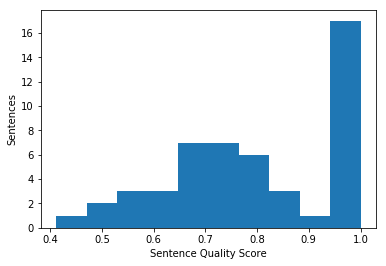

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [8]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2039962326    {'12 and 18 months__58__74': 0.985721784079773...
2039962327    {'1953__113__117': 0.778418616474394, '1953 ._...
2039962328    {'1953__71__75': 0.9856577859941497, 'no_time'...
2039962329    {'1957 - 58__60__69': 0.8978163780674249, '195...
2039962330    {'last june__75__84': 1.0, '1984__19__23': 0.2...
2039962331    {'1995__23__27': 0.8540083813267555, '100 days...
2039962332    {'2003__25__29': 0.9022628830026042, '2003 .__...
2039962333    {'2003__6__10': 0.9853621785010879, 'no_time':...
2039962334                              {'2005__132__136': 1.0}
2039962335    {'no_time': 0.4912557560960098, '2005__132__13...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [9]:
results_open["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
14a6333917cb377857576312230d4f2d,1,1,1,8.000000,0.985068,0.985179,0.999887,0.945910,0.947368,0.998460
19d1cf4672a44a2b873901990979111a,50,50,1,31.100000,0.599373,0.745236,0.804273,0.524891,0.684296,0.767053
1c652ec0bfd445a7e3e6fa284c4502f1,33,33,1,12.818182,0.707020,0.808219,0.874787,0.666703,0.772679,0.862846
1ffcb4b845f71b6e949a4786ea4e376f,4,4,1,19.000000,0.869924,0.882158,0.986132,0.827731,0.844888,0.979693
2a37e935e9b4faac462a267762144ea9,5,5,1,30.400000,0.825542,0.879689,0.938448,0.763536,0.826072,0.924297


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

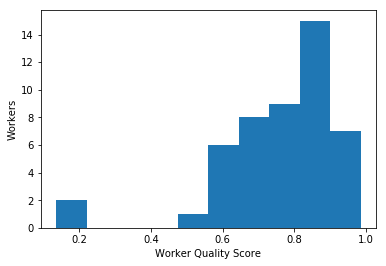

In [10]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

## Save crowd results in a csv file

In [11]:
rows = []
header = list(results_open["units"])
header.extend(["validated_time", "no_of_annotations", "validated_time_final_score", "validated_time_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []
    all_time_runs = results_open["units"]["input.all_runs_times"].iloc[i].lower().split("###")
    keys.extend(all_time_runs)
    keys.append("no_time")
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.selectedtags_desc"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [12]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_data = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_time.csv")
crowd_data = pd.read_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv")
crowd_data["Experts"] = pd.Series(np.random.randn(len(crowd_data.index)), index=crowd_data.index)

for i in range(len(crowd_data.index)):
    subset = expert_data[(expert_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_time"].iloc[i]:
            found = True
            break
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv", index=False)    


/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
import eval_crowd_results as eval_script

crowd = pd.read_csv('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_time_final_score")
     
with open('../../data/pilot_crowd_data/results//eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../../data/pilot_crowd_data/results/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,58,48,58,0,0.500000,1.000000,0.646341,0.666667
1,0.10,58,52,54,0,0.517857,1.000000,0.670732,0.682353
2,0.15,58,53,53,0,0.522523,1.000000,0.676829,0.686391
3,0.20,58,57,49,0,0.542056,1.000000,0.701220,0.703030
4,0.25,58,58,48,0,0.547170,1.000000,0.707317,0.707317
5,0.30,56,61,45,2,0.554455,0.965517,0.713415,0.704403
6,0.35,55,64,42,3,0.567010,0.948276,0.725610,0.709677
7,0.40,54,69,37,4,0.593407,0.931034,0.750000,0.724832
8,0.45,52,74,32,6,0.619048,0.896552,0.768293,0.732394
9,0.50,52,77,29,6,0.641975,0.896552,0.786585,0.748201
